In [1]:
import sys
sys.path.append("..")

In [2]:
import numpy as np
import logging
import pickle
import glob

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import RobustScaler
from sklearn.utils import check_random_state

from recnn.preprocessing import permute_by_pt
from recnn.preprocessing import extract

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)

In [3]:
def load_test(filename_train, filename_test):
    # Make training data
    print("Loading training data...")

    fd = open(filename_train, "rb")
    X, y = pickle.load(fd)
    fd.close()
    indices = np.random.permutation(len(X))
    size = min(80000, len(X))
    X = [X[i] for i in indices[:size]]
    y = [y[i] for i in indices[:size]]
    y = np.array(y)

    print("\tfilename = %s" % filename_train)
    print("\tX size = %d" % len(X))
    print("\ty size = %d" % len(y))

    # Preprocessing 
    print("Preprocessing...")
    X = [extract(permute_by_pt(jet)) for jet in X]
    tf = RobustScaler().fit(np.vstack([jet["content"] for jet in X]))

    for jet in X:
        jet["content"] = tf.transform(jet["content"])

    # Make test data 
    print("Loading test data...")

    fd = open(filename_test, "rb")
    X, y = pickle.load(fd)
    fd.close()
    y = np.array(y)

    print("\tfilename = %s" % filename_test)
    print("\tX size = %d" % len(X))
    print("\ty size = %d" % len(y))

    # Preprocessing 
    print("Preprocessing...")
    X = [extract(permute_by_pt(jet)) for jet in X]

    for jet in X:
        jet["content"] = tf.transform(jet["content"])
        
    # Cropping
    X_ = [j for j in X if 250 < j["pt"] < 300 and 50 < j["mass"] < 110]
    y_ = [y[i] for i, j in enumerate(X) if 250 < j["pt"] < 300 and 50 < j["mass"] < 110]

    X = X_
    y = y_
    
    print("\tX size = %d" % len(X))
    print("\ty size = %d" % len(y))
    
    # Weights for flatness in pt
    pdf, edges = np.histogram([j["pt"] for j in X], density=True, range=[250, 300], bins=100)
    pts = [j["pt"] for j in X]
    indices = np.searchsorted(edges, pts) - 1
    inv_w = 1. / pdf[indices]
    inv_w /= inv_w.sum()
        
    return X, y, inv_w

Loading training data...
	filename = ../data/w-vs-qcd/anti-kt/antikt-train.pickle-py27-kt
	X size = 80000
	y size = 80000
Preprocessing...
Loading test data...
	filename = ../data/w-vs-qcd/anti-kt/antikt-test.pickle-py27-kt
	X size = 20000
	y size = 20000
Preprocessing...
	X size = 7690
	y size = 7690
Loading ../models/delphes/w-kt-4.pickle
(0.91106473849932601, '../models/delphes/w-kt-4.pickle')
Loading ../models/delphes/w-kt-3.pickle


/home/gilles/anaconda3/envs/hep/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: divide by zero encountered in divide
/home/gilles/anaconda3/envs/hep/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: divide by zero encountered in divide


(0.91131942609114591, '../models/delphes/w-kt-3.pickle')
Loading ../models/delphes/w-kt-1.pickle
(0.91257978891946845, '../models/delphes/w-kt-1.pickle')
Loading ../models/delphes/w-kt-5.pickle
(0.91042728063084355, '../models/delphes/w-kt-5.pickle')
Loading ../models/delphes/w-kt-2.pickle
(0.91055376682606859, '../models/delphes/w-kt-2.pickle')
roc_auc(kt) = 0.9112 +- 0.0008
Loading training data...
	filename = ../data/w-vs-qcd/anti-kt/antikt-delphes-train.pickle-kt
	X size = 80000
	y size = 80000
Preprocessing...
Loading test data...
	filename = ../data/w-vs-qcd/anti-kt/antikt-delphes-test.pickle-kt
	X size = 20000
	y size = 20000
Preprocessing...
	X size = 5886
	y size = 5886
Loading ../models/delphes/w-delphes-kt-6.pickle
(0.87778034458116228, '../models/delphes/w-delphes-kt-6.pickle')
Loading ../models/delphes/w-delphes-kt-3.pickle


/home/gilles/anaconda3/envs/hep/lib/python2.7/site-packages/ipykernel/__main__.py:70: RuntimeWarning: divide by zero encountered in divide
/home/gilles/anaconda3/envs/hep/lib/python2.7/site-packages/ipykernel/__main__.py:72: RuntimeWarning: divide by zero encountered in divide


(0.8796194613733368, '../models/delphes/w-delphes-kt-3.pickle')
Loading ../models/delphes/w-delphes-kt-7.pickle
(0.88036027098083336, '../models/delphes/w-delphes-kt-7.pickle')
Loading ../models/delphes/w-delphes-kt-2.pickle
(0.88032671579930633, '../models/delphes/w-delphes-kt-2.pickle')
Loading ../models/delphes/w-delphes-kt-4.pickle
(0.87744191512567404, '../models/delphes/w-delphes-kt-4.pickle')
Loading ../models/delphes/w-delphes-kt-5.pickle
(0.87984755590968755, '../models/delphes/w-delphes-kt-5.pickle')
Loading ../models/delphes/w-delphes-kt-1.pickle
(0.88096471784863728, '../models/delphes/w-delphes-kt-1.pickle')
Loading ../models/delphes/w-delphes-kt-9.pickle
(0.88035094276809756, '../models/delphes/w-delphes-kt-9.pickle')
Loading ../models/delphes/w-delphes-kt-8.pickle
(0.87822043756886725, '../models/delphes/w-delphes-kt-8.pickle')
Loading ../models/delphes/w-delphes-kt-10.pickle
(0.8786824534674863, '../models/delphes/w-delphes-kt-10.pickle')
roc_auc(delphes-kt) = 0.8794 +-

/home/gilles/anaconda3/envs/hep/lib/python2.7/site-packages/ipykernel/__main__.py:103: RuntimeWarning: divide by zero encountered in divide
/home/gilles/anaconda3/envs/hep/lib/python2.7/site-packages/ipykernel/__main__.py:105: RuntimeWarning: divide by zero encountered in divide


(0.84085677606272946, '../models/delphes/w-images-kt-8.pickle')
Loading ../models/delphes/w-images-kt-6.pickle
(0.84133659015593643, '../models/delphes/w-images-kt-6.pickle')
Loading ../models/delphes/w-images-kt-9.pickle
(0.83985220837088814, '../models/delphes/w-images-kt-9.pickle')
Loading ../models/delphes/w-images-kt-7.pickle
(0.84340916974128433, '../models/delphes/w-images-kt-7.pickle')
roc_auc(images-kt) = 0.8408 +- 0.0016


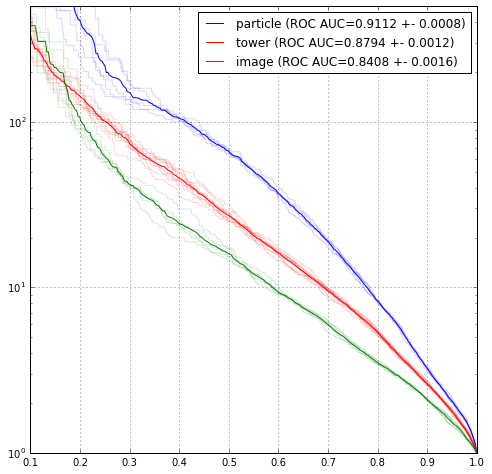

In [5]:
from recnn.recnn import grnn_predict_simple
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import glob
from scipy import interp


def predict(X, filename):
    fd = open(f, "rb")
    params = pickle.load(fd)
    fd.close()
    
    y_pred = grnn_predict_simple(params, X)
    
    return y_pred


# Plot KT - particle level
s = "kt"
color = "b"
X, y, w = load_test("../data/w-vs-qcd/anti-kt/antikt-train.pickle-py27-%s" % s,
                    "../data/w-vs-qcd/anti-kt/antikt-test.pickle-py27-%s" % s) 

inv_fprs = []
base_tpr = np.linspace(0.1, 1, 301)
rocs = []

for f in glob.glob("../models/delphes/w-%s-[0-9]*.pickle" % s):
    print("Loading %s" % f)

    y_pred = predict(X, f)
    rocs.append(roc_auc_score(y, y_pred, sample_weight=w))

    print(rocs[-1], f)

    fpr, tpr, _ = roc_curve(y, y_pred, sample_weight=w)
    plt.plot(tpr, 1. / fpr, color, alpha=0.15)

    inv_fpr = interp(base_tpr, tpr, 1. / fpr)
    inv_fprs.append(inv_fpr)

inv_fprs = np.array(inv_fprs)
mean_inv_fprs = inv_fprs.mean(axis=0)

plt.plot(base_tpr, mean_inv_fprs, color, 
         label="particle (ROC AUC=%.4f +- %.4f)" % (np.mean(rocs), np.std(rocs)))

print("roc_auc(%s) = %.4f +- %.4f" % (s, np.mean(rocs), np.std(rocs)))


# Plot KT - delphes
s = "delphes-kt"
color = "r"
X, y, w = load_test("../data/w-vs-qcd/anti-kt/antikt-delphes-train.pickle-kt",
                    "../data/w-vs-qcd/anti-kt/antikt-delphes-test.pickle-kt") 

inv_fprs = []
base_tpr = np.linspace(0.1, 1, 301)
rocs = []

for f in glob.glob("../models/delphes/w-%s-[0-9]*.pickle" % s):
    print("Loading %s" % f)

    y_pred = predict(X, f)
    rocs.append(roc_auc_score(y, y_pred, sample_weight=w))

    print(rocs[-1], f)

    fpr, tpr, _ = roc_curve(y, y_pred, sample_weight=w)
    plt.plot(tpr, 1. / fpr, color, alpha=0.15)

    inv_fpr = interp(base_tpr, tpr, 1. / fpr)
    inv_fprs.append(inv_fpr)

inv_fprs = np.array(inv_fprs)
mean_inv_fprs = inv_fprs.mean(axis=0)

plt.plot(base_tpr, mean_inv_fprs, color, 
         label="tower (ROC AUC=%.4f +- %.4f)" % (np.mean(rocs), np.std(rocs)))

print("roc_auc(%s) = %.4f +- %.4f" % (s, np.mean(rocs), np.std(rocs)))


# Plot KT - images
s = "images-kt"
color = "g"
X, y, w = load_test("../data/w-vs-qcd/anti-kt/images-train-80k.pickle",
                    "../data/w-vs-qcd/anti-kt/images-test.pickle") 

inv_fprs = []
base_tpr = np.linspace(0.1, 1, 301)
rocs = []

for f in glob.glob("../models/delphes/w-%s-[0-9]*.pickle" % s):
    print("Loading %s" % f)

    y_pred = predict(X, f)
    rocs.append(roc_auc_score(y, y_pred, sample_weight=w))

    print(rocs[-1], f)

    fpr, tpr, _ = roc_curve(y, y_pred, sample_weight=w)
    plt.plot(tpr, 1. / fpr, color, alpha=0.15)

    inv_fpr = interp(base_tpr, tpr, 1. / fpr)
    inv_fprs.append(inv_fpr)

inv_fprs = np.array(inv_fprs)
mean_inv_fprs = inv_fprs.mean(axis=0)

plt.plot(base_tpr, mean_inv_fprs, color, 
         label="image (ROC AUC=%.4f +- %.4f)" % (np.mean(rocs), np.std(rocs)))

print("roc_auc(%s) = %.4f +- %.4f" % (s, np.mean(rocs), np.std(rocs)))


plt.xlim([0.1, 1.0])
plt.ylim(1, 500)
plt.yscale("log")
plt.legend(loc="best")
plt.grid()
plt.show()